In [1]:
# import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
collected_data = pd.read_csv('data/collected_data.csv') # Read the CSV file

keep_col = ['sahm', 'indpro', 'sp500', 'tr10', 't10yff', 'unrate', 'recession']
all_data = collected_data[keep_col]
del collected_data

all_data.describe().T

count        mean          std        min         25%         50%  \
sahm       752.0    0.411463     0.984652  -0.370000   -0.030000    0.030000   
indpro     752.0   69.633349    25.572804  24.649600   47.517850   64.936900   
sp500      752.0  975.956077  1170.838974  54.750000  104.175000  445.020000   
tr10       752.0    5.856778     2.962996   0.623636    3.869750    5.578673   
t10yff     752.0    0.986966     1.617967  -6.291905    0.122619    1.160208   
unrate     752.0    0.058894     0.017187   0.034000    0.046000    0.056000   
recession  752.0    0.113032     0.316843   0.000000    0.000000    0.000000   

                   75%          max  
sahm          0.370000     9.500000  
indpro       95.992275   104.103800  
sp500      1329.197500  5591.960000  
tr10          7.576274    15.323810  
t10yff        2.181648     3.803636  
unrate        0.070000     0.148000  
recession     0.000000     1.000000

In [3]:
# We select the column we want to analyze (eg 'sahm').
time_series = all_data['sahm'].copy()
# Checking for stationarity with the ADF test.
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value ({}): {}'.format(key, value))
    
# Differentiation of the time series:
# If the time series is not stationary, we can make it stationary by differentiation!
# time_series.diff().dropna()
if result[1] > 0.05:  # If the p-value is greater than 0.05, the series is not stationary.
    time_series = time_series.diff().dropna()

if result[1] > 0.05:
    print('\n Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. \n')
else:
    print('\n Reject the null hypothesis (H0), the data does not have a unit root and is stationary. \n')

# Autocorrelation study (ACF)
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=22) # We want to see the autocorrelation for up to 22 lag periods.
plt.title('Autocorrelation Function (ACF): SAHM')
plt.xlabel("Periods", color = "purple")
plt.ylabel("ACF", color = "purple")
plt.show()

ADF Statistic: -5.6369896463108535
p-value: 1.0575340630708577e-06
Critical Value (1%): -3.439314999916068
Critical Value (5%): -2.8654965012008677
Critical Value (10%): -2.5688768817372867

 Reject the null hypothesis (H0), the data does not have a unit root and is stationary. 



<Figure size 1000x600 with 0 Axes>

ADF Statistic: -3.297416819995987
p-value: 0.014994338313876098
Critical Value (1%): -3.439110818166223
Critical Value (5%): -2.8654065210185795
Critical Value (10%): -2.568828945705979

 Reject the null hypothesis (H0), the data does not have a unit root and is stationary. 



<Figure size 1000x600 with 0 Axes>

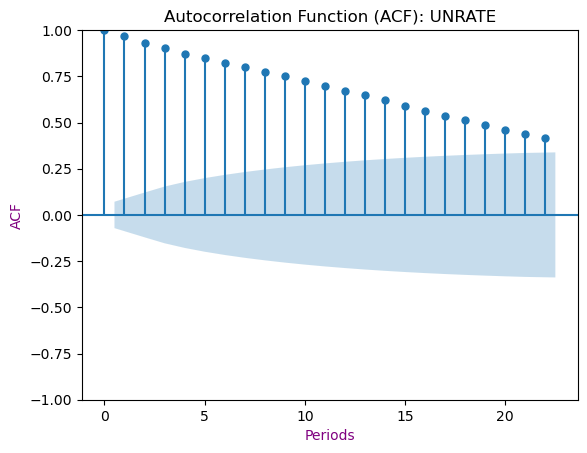

In [4]:
# We select the column we want to analyze (eg 'unrate').
time_series = all_data['unrate'].copy()
# Checking for stationarity with the ADF test.
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value ({}): {}'.format(key, value))
    
# Differentiation of the time series:
# If the time series is not stationary, we can make it stationary by differentiation!
# time_series.diff().dropna()
if result[1] > 0.05:  # If the p-value is greater than 0.05, the series is not stationary.
    time_series = time_series.diff().dropna()

if result[1] > 0.05:
    print('\n Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. \n')
else:
    print('\n Reject the null hypothesis (H0), the data does not have a unit root and is stationary. \n')

# Autocorrelation study (ACF)
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=22) # We want to see the autocorrelation for up to 22 lag periods.
plt.title('Autocorrelation Function (ACF): UNRATE')
plt.xlabel("Periods", color = "purple")
plt.ylabel("ACF", color = "purple")
plt.show()

In [5]:
# We select the column we want to analyze (eg 't10yff').
time_series = all_data['t10yff'].copy()
# Checking for stationarity with the ADF test.
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value ({}): {}'.format(key, value))
    
# Differentiation of the time series:
# If the time series is not stationary, we can make it stationary by differentiation!
# time_series.diff().dropna()
if result[1] > 0.05:  # If the p-value is greater than 0.05, the series is not stationary.
    time_series = time_series.diff().dropna()

if result[1] > 0.05:
    print('\n Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. \n')
else:
    print('\n Reject the null hypothesis (H0), the data does not have a unit root and is stationary. \n')

# Autocorrelation study (ACF)
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=22) # We want to see the autocorrelation for up to 22 lag periods.
plt.title('Autocorrelation Function (ACF): T10YFF')
plt.xlabel("Periods", color = "purple")
plt.ylabel("ACF", color = "purple")
plt.show()

ADF Statistic: -5.216430768027504
p-value: 8.137792145647417e-06
Critical Value (1%): -3.4392782790913206
Critical Value (5%): -2.865480319267325
Critical Value (10%): -2.568868260909806

 Reject the null hypothesis (H0), the data does not have a unit root and is stationary. 



<Figure size 1000x600 with 0 Axes>

ADF Statistic: -1.4074281681214578
p-value: 0.5787098258615931
Critical Value (1%): -3.4392661055744767
Critical Value (5%): -2.86547495466493
Critical Value (10%): -2.56886540295664

 Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. 



<Figure size 1000x600 with 0 Axes>

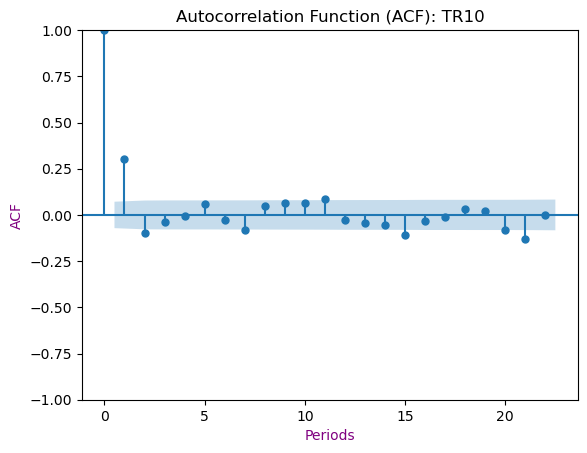

In [6]:
# We select the column we want to analyze (eg 'tr10').
time_series = all_data['tr10'].copy()
# Checking for stationarity with the ADF test.
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value ({}): {}'.format(key, value))
    
# Differentiation of the time series:
# If the time series is not stationary, we can make it stationary by differentiation!
# time_series.diff().dropna()
if result[1] > 0.05:  # If the p-value is greater than 0.05, the series is not stationary.
    time_series = time_series.diff().dropna()

if result[1] > 0.05:
    print('\n Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. \n')
else:
    print('\n Reject the null hypothesis (H0), the data does not have a unit root and is stationary. \n')

# Autocorrelation study (ACF)
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=22) # We want to see the autocorrelation for up to 22 lag periods.
plt.title('Autocorrelation Function (ACF): TR10')
plt.xlabel("Periods", color = "purple")
plt.ylabel("ACF", color = "purple")
plt.show()

In [22]:
# Applying .diff() to a time series, we get the difference between values ​​in consecutive periods.
time_series.diff()

1         NaN
2     -0.2689
3     -0.0807
4     -0.0806
5     -0.0268
        ...  
747    0.1374
748    0.8384
749   -0.7035
750   -1.0382
751    1.8071
Name: indpro, Length: 751, dtype: float64

In [26]:
# Checking for stationarity with the ADF test the differentiated feature.
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value ({}): {}'.format(key, value))
    
# Differentiation of the time series:
# If the time series is not stationary, we can make it stationary by differentiation!
# time_series.diff().dropna()
if result[1] > 0.05:  # If the p-value is greater than 0.05, the series is not stationary.
    time_series = time_series.diff().dropna()

if result[1] > 0.05:
    print('\n Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. \n')
else:
    print('\n Reject the null hypothesis (H0), the data does not have a unit root and is stationary. \n')

# Autocorrelation study (ACF)
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=22) # We want to see the autocorrelation for up to 22 lag periods.
plt.title('Autocorrelation Function (ACF): TR10 - the differentiated feature')
plt.xlabel("Periods", color = "purple")
plt.ylabel("ACF", color = "purple")
plt.show()

ADF Statistic: -7.262854667561167
p-value: 1.664008889779053e-10
Critical Value (1%): -3.4392177416762086
Critical Value (5%): -2.8654536415414684
Critical Value (10%): -2.5688540485756026

 Reject the null hypothesis (H0), the data does not have a unit root and is stationary. 



<Figure size 1000x600 with 0 Axes>

In [8]:
# We select the column we want to analyze (eg 'sp500').
time_series = all_data['sp500'].copy()
# Checking for stationarity with the ADF test.
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value ({}): {}'.format(key, value))
    
# Differentiation of the time series:
# If the time series is not stationary, we can make it stationary by differentiation!
# time_series.diff().dropna()
if result[1] > 0.05:  # If the p-value is greater than 0.05, the series is not stationary.
    time_series = time_series.diff().dropna()

if result[1] > 0.05:
    print('\n Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. \n')
else:
    print('\n Reject the null hypothesis (H0), the data does not have a unit root and is stationary. \n')

# Autocorrelation study (ACF)
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=22) # We want to see the autocorrelation for up to 22 lag periods.
plt.title('Autocorrelation Function (ACF): SP500')
plt.xlabel("Periods", color = "purple")
plt.ylabel("ACF", color = "purple")
plt.show()

ADF Statistic: 4.079858778445087
p-value: 1.0
Critical Value (1%): -3.439302726125018
Critical Value (5%): -2.8654910924750547
Critical Value (10%): -2.5688740002680124

 Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. 



<Figure size 1000x600 with 0 Axes>

In [9]:
# We select the column we want to analyze (eg 'indpro').
time_series = all_data['indpro'].copy()
# Checking for stationarity with the ADF test.
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value ({}): {}'.format(key, value))
    
# Differentiation of the time series:
# If the time series is not stationary, we can make it stationary by differentiation!
# time_series.diff().dropna()
if result[1] > 0.05:  # If the p-value is greater than 0.05, the series is not stationary.
    time_series = time_series.diff().dropna()

if result[1] > 0.05:
    print('\n Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. \n')
else:
    print('\n Reject the null hypothesis (H0), the data does not have a unit root and is stationary. \n')

# Autocorrelation study (ACF)
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=22) # We want to see the autocorrelation for up to 22 lag periods.
plt.title('Autocorrelation Function (ACF): INDPRO')
plt.xlabel("Periods", color = "purple")
plt.ylabel("ACF", color = "purple")
plt.show()

ADF Statistic: -1.179378807685352
p-value: 0.6824029360141746
Critical Value (1%): -3.4392177416762086
Critical Value (5%): -2.8654536415414684
Critical Value (10%): -2.5688540485756026

 Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. 



<Figure size 1000x600 with 0 Axes>